# CRISP DM

## Business Understanding

Wine adalah minuman beralkohol yang dihasilkan dari proses fermentasi jus anggur. Anggur dibuat melalui fermentasi alami atau kontrol fermentasi dengan menggunakan ragi yang mengubah gula dalam jus anggur menjadi alkohol. Wine memiliki beragam varietas, rasa, aroma, dan karakteristik yang unik, tergantung pada jenis anggur, metode produksi, wilayah penanaman, dan faktor-faktor lainnya.

Problem:

1. Kurangnya pemahaman tentang faktor-faktor yang mempengaruhi kualitas wine.
2. Kesulitan dalam mengidentifikasi preferensi konsumen terkait varietas anggur, wilayah penanaman, harga, dan atribut lainnya yang mempengaruhi persepsi kualitas wine.
3. Tidak adanya prediksi yang akurat terkait kualitas wine.

Tujuan:

1. Memahami faktor-faktor yang mempengaruhi kualitas wine untuk meningkatkan kemampuan dalam memilih, menghasilkan, atau menyediakan wine berkualitas.
2. Meningkatkan pemahaman tentang preferensi konsumen dan tren pasar terkait varietas anggur, wilayah penanaman, harga, dan atribut lainnya.

## Data Understanding

0.  FixedAcidity        = float64 
1.	VolatileAcidity     = float64
2.	CitricAcid		    = float64
3.	Residual Sugar      = float64
4.	Chlorides		    = float64
5.	FreeSulfurDioxide   = float64
6.	TotalSulfurDioxide	= float64
7.	Density 		    = float64
8.	pH		            = float64
9.  sulphates           = float64
10. alcohol             = float64
11. quality             = object

- FixedAcidity adalah variabel bertipe data float64. Variabel ini mengukur tingkat keasaman yang tidak mudah menguap dalam anggur.

- VolatileAcidity adalah variabel bertipe data float64. Variabel ini mengukur tingkat keasaman yang mudah menguap dalam anggur.

- CitricAcid adalah variabel bertipe data float64. Variabel ini mengukur kadar asam sitrat dalam anggur

- Residual Sugar adalah variabel bertipe data float64. Variabel ini mengukur jumlah gula yang tersisa setelah fermentasi selesai.

- Chlorides adalah variabel bertipe data float64. Variabel ini mengukur kadar garam dalam anggur

- FreeSulfurDioxide adalah variabel bertipe data float64. Variabel ini mengukur jumlah sulfur dioksida yang bebas dalam anggur.

- TotalSulfurDioxide adalah variabel bertipe data float64. Variabel ini mengukur jumlah total sulfur dioksida dalam anggur.

- Density adalah variabel bertipe data float64. Variabel ini mengukur massa per unit volume anggur.

- pH adalah variabel bertipe data float64. Variabel ini mengukur tingkat keasaman atau kebasaan larutan anggur

- sulphates adalah variabel bertipe data float64. Variabel ini mengukur kadar sulfat dalam anggur.

- alcohol adalah variabel bertipe data float64. Variabel ini mengukur persentase alkohol dalam anggur.

- quality adalah variabel bertipe data object. Variabel ini merupakan variabel target yang menunjukkan kualitas anggur.

## Import Library


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("wine.csv")
df.head()

,FixedAcidity,VolatileAcidity,CitricAcid,Residual Sugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FixedAcidity        1599 non-null   float64
 1   VolatileAcidity     1599 non-null   float64
 2   CitricAcid          1599 non-null   float64
 3   Residual Sugar      1599 non-null   float64
 4   Chlorides           1599 non-null   float64
 5   FreeSulfurDioxide   1599 non-null   float64
 6   TotalSulfurDioxide  1599 non-null   float64
 7   Density             1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   sulphates           1599 non-null   float64
 10  alcohol             1599 non-null   float64
 11  quality             1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


## Data Preparation


In [36]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['quality']=enc.fit_transform(df['quality'])
df.head()

,FixedAcidity,VolatileAcidity,CitricAcid,Residual Sugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [37]:
X = df.drop(columns=['quality'], axis=1)
Y = df['quality']

In [38]:
print(X),(Y)

      FixedAcidity  VolatileAcidity  CitricAcid  Residual Sugar  Chlorides  \
0              7.4            0.700        0.00             1.9      0.076   
1              7.8            0.880        0.00             2.6      0.098   
2              7.8            0.760        0.04             2.3      0.092   
3             11.2            0.280        0.56             1.9      0.075   
4              7.4            0.700        0.00             1.9      0.076   
...            ...              ...         ...             ...        ...   
1594           6.2            0.600        0.08             2.0      0.090   
1595           5.9            0.550        0.10             2.2      0.062   
1596           6.3            0.510        0.13             2.3      0.076   
1597           5.9            0.645        0.12             2.0      0.075   
1598           6.0            0.310        0.47             3.6      0.067   

      FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  sul

(None,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1594    0
 1595    1
 1596    1
 1597    0
 1598    1
 Name: quality, Length: 1599, dtype: int32)

## Visualisasi Data

### Convert good dan bad menjadi 0 dan 1

Text(0.5, 1.0, 'Quality')

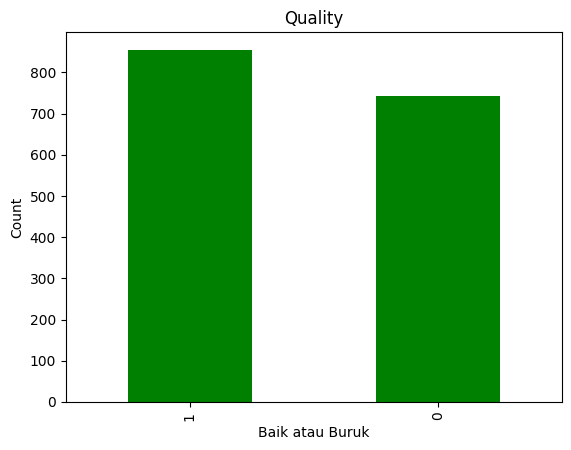

In [39]:
plt.clf()
df.quality.value_counts().plot(kind='bar',color='green')
plt.xlabel("Baik atau Buruk")
plt.ylabel("Count")
plt.title("Quality")

<AxesSubplot:title={'center':'Persentase good and bad quality wine'}, ylabel='quality'>

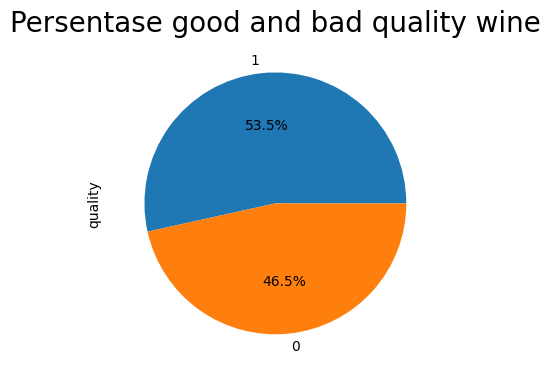

In [40]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Persentase good and bad quality wine',fontsize = 20)
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")

## Split Data


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, x_train.shape, x_test.shape)

(1599, 11) (1279, 11) (320, 11)


## Modelling Data

## Model Training

In [42]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\ARYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluasi Model

In [43]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [44]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.7490226739640344


In [45]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [46]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.740625


In [47]:
input_data = (74, 7, 0, 19, 76, 110, 340, 9978, 351, 56, 94)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Wine Berkualitas Buruk')
else:
    print('Wine Berkualitas Baik')

[0]
Wine Berkualitas Buruk


c:\Users\ARYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Deployment

In [48]:
import pickle

filename = 'wine.sav'
pickle.dump(model, open(filename, 'wb'))